In [26]:
# Packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib notebook
sns.set_style("darkgrid")

In [11]:
# Loading labelled dataset: my_list contains everything
# with open('dataframe_tot.pickle', 'rb') as handle:
#     my_list = pickle.load(handle)
    
with open('dataframe_tot_20181017103709.pkl', 'rb') as handle:
    my_list = pickle.load(handle)
    
    

In [12]:
# Set two arrays: one for raw data and another one for labels
dataset = []
labels = []
for sess in my_list.iterrows():
    dataset.append(sess[1][0:150])
    labels.append(sess[1][150])
    
np.shape(dataset)

(1725, 150)

<IPython.core.display.Javascript object>


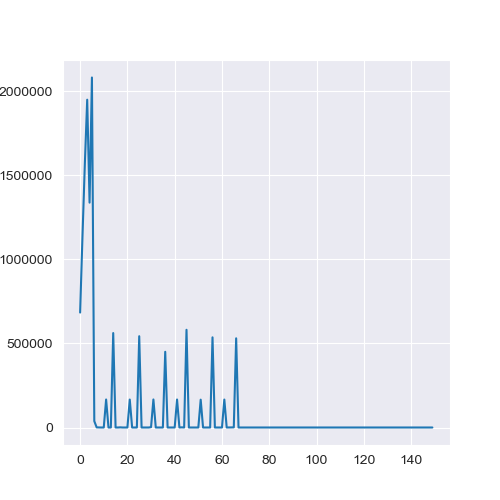

In [14]:
# Figure: plotting an example session trace
plt.figure(figsize=(5, 5))
plt.plot(dataset[0])

In [35]:
#  Extracting features: session length, avg_tbs, std_tbs, total sent TBS
# Building a py list with session lengths (number of samples)
sess_avg_tbs = []
sess_std_tbs = []
sess_tot_tbs = []
sess_med_tbs = []
sess_skew_tbs = []
sess_kurtosis_tbs = []

for sess in dataset:
    sess_avg_tbs.append(np.mean(sess))
    sess_std_tbs.append(np.std(sess))
    sess_tot_tbs.append(sum(sess))
    sess_med_tbs.append(np.median(sess))
#     sess_skew_tbs.append(skew(sess))
#     sess_kurtosis_tbs.append(kurtosis(sess))
    
# Creating the dataFrame
features = {'sess_avg_tbs': sess_avg_tbs, 'sess_std_tbs':sess_std_tbs, 
            'sess_tot_tbs':sess_tot_tbs, 'sess_med_tbs':sess_med_tbs}
df_features = pd.DataFrame(data=features)

# Saving manual features
df_features.to_pickle('manual_features_1725.pickle')
    

In [36]:
with open('manual_features_1725.pickle', 'rb') as handle:
    testing = pickle.load(handle)
    
testing

,sess_avg_tbs,sess_med_tbs,sess_std_tbs,sess_tot_tbs
0,8.662514e+04,0.0,3.150045e+05,12993771.0
1,5.114542e+04,0.0,2.249799e+05,7671813.0
2,6.444314e+04,0.0,2.780007e+05,9666471.0
3,1.554863e+04,0.0,1.272570e+05,2332295.0
4,9.870533e+02,0.0,1.204852e+04,148058.0
5,3.579888e+04,0.0,2.247456e+05,5369832.0
6,1.332560e+05,0.0,7.187418e+05,19988407.0
7,1.179661e+04,0.0,1.411930e+04,1769491.0
8,8.765574e+04,0.0,4.209989e+05,13148361.0
9,5.176227e+04,0.0,3.979295e+05,7764341.0


## __PLOTTING__

<IPython.core.display.Javascript object>


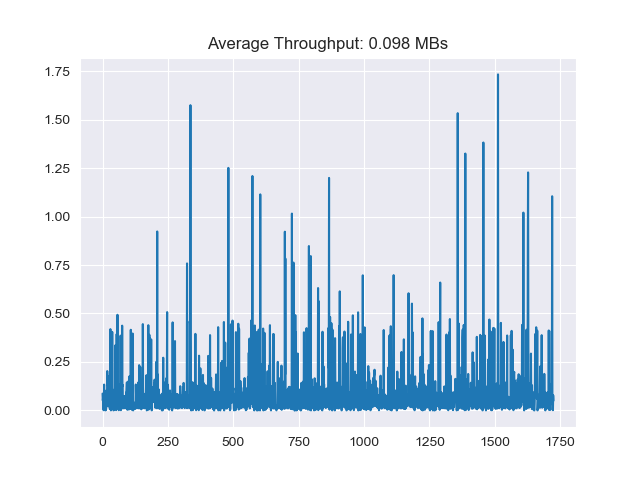

Text(0.5,1,'Average Throughput: 0.098 MBs')

In [16]:
# Figure: plotting the Transpot Block Size (Packet size) -> Data rate
sess_avg_tbs_MB =  [i * 1e-6 for i in sess_avg_tbs]
plt.figure()
plt.plot(sess_avg_tbs_MB)
plt.title('Average Throughput: '+ str(round(np.mean(sess_avg_tbs_MB),3 ) ) + ' MBs')

<IPython.core.display.Javascript object>


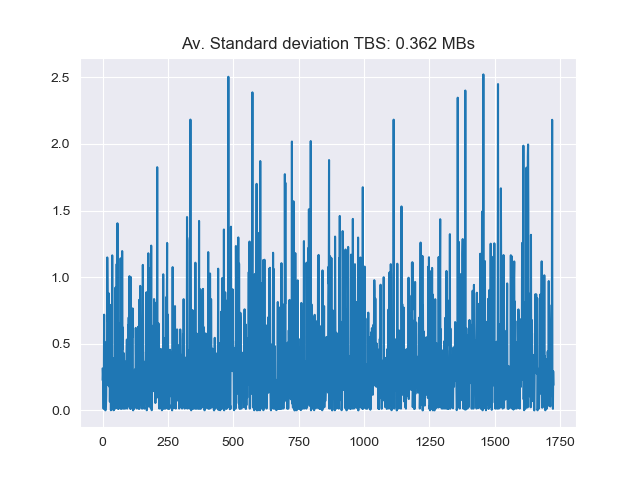

Text(0.5,1,'Av. Standard deviation TBS: 0.362 MBs')

In [17]:
# Figure: plotting the std TBS
sess_std_tbs_MB =  [i * 1e-6 for i in sess_std_tbs]
plt.figure()
plt.plot(sess_std_tbs_MB)
plt.title('Av. Standard deviation TBS: '+ str(round(np.mean(sess_std_tbs_MB), 3 ) ) + ' MBs')

<IPython.core.display.Javascript object>


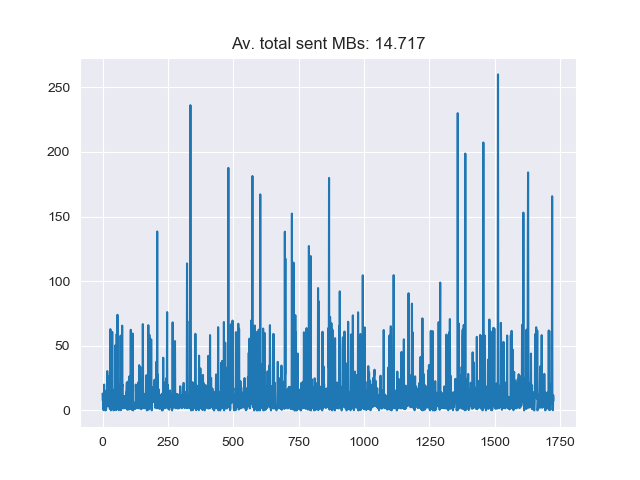

Text(0.5,1,'Av. total sent MBs: 14.717')

In [18]:
# Figure: plotting the total sent TBS
sess_tot_tbs_MB =  [i * 1e-6 for i in sess_tot_tbs]
plt.figure()
plt.plot(sess_tot_tbs_MB)
plt.title('Av. total sent MBs: '+ str(round(np.mean(sess_tot_tbs_MB), 3 ) ) )

## __CLUSTERING__

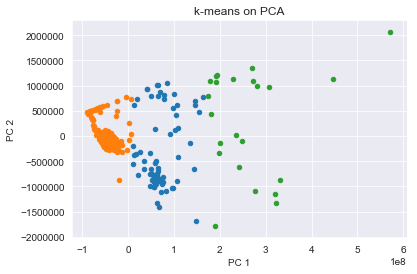

In [9]:
# Computing k-means on the feature vector

# Standardizing the features
x = StandardScaler().fit_transform(df_features)
#x = df_features

# k-means
num_cluster = 3
est = KMeans(n_clusters=num_cluster)
est.fit(x)
df_features['labels'] = est.labels_

# Computing k-means on PCA over the feature vector

# PCA
x = df_features
n_comps = 3
pca = PCA(n_components=n_comps)
principalComponents = pca.fit_transform(x)
cols = ['pc' + str(ind+1) for ind in range(n_comps)]
df_pca = pd.DataFrame(data = principalComponents, columns = cols)

# k-means
num_cluster = 3
est_pca = KMeans(n_clusters=num_cluster)
est_pca.fit(df_pca)
labels_pca = est_pca.labels_
df_pca['labels'] = labels_pca

# plot
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('k-means on PCA')

for ind in set(df_pca['labels']):
    indicesToKeep = df_pca['labels'] == ind
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
                   , df_pca.loc[indicesToKeep, 'pc2']
                   , s = 20
                   )